Dataset shape after filtering invalid 'result': (24580, 29)
Class Distribution:
 1    9189
-1    9189
 0    6202
Name: result, dtype: int64
Forced Majority Class: 1 (37.38% of the data)
Baseline Accuracy (Forced Majority Class): 0.37

Baseline Confusion Matrix:
[[   0    0 1838]
 [   0    0 1240]
 [   0    0 1838]]

Baseline Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1838
           0       0.00      0.00      0.00      1240
           1       0.37      1.00      0.54      1838

    accuracy                           0.37      4916
   macro avg       0.12      0.33      0.18      4916
weighted avg       0.14      0.37      0.20      4916



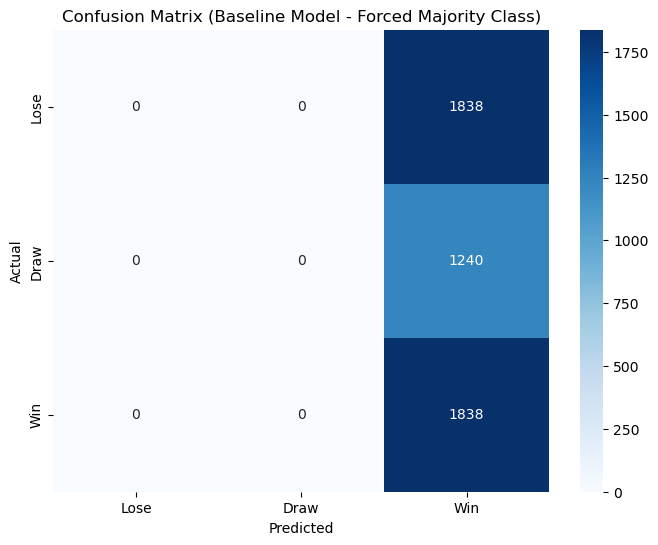


Feature Importance for Baseline Model: Not Applicable


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
dataset = pd.read_csv('understat_per_game.csv')

# Step 2: Define the target variable ('result') and map to numeric values
result_mapping = {'w': 1, 'd': 0, 'l': -1}
dataset['result'] = dataset['result'].map(result_mapping)

# Drop rows with missing or invalid values in the 'result' column
dataset = dataset.dropna(subset=['result'])
print(f"Dataset shape after filtering invalid 'result': {dataset.shape}")

# Step 3: Define features (X) and target (y)
tactical_features = ['ppda_coef', 'oppda_coef', 'deep', 'deep_allowed', 'ppda_att', 'ppda_def', 'oppda_att', 'oppda_def']
X = dataset[tactical_features]  # Use only specified features
y = dataset['result']  # Target variable (win=1, draw=0, lose=-1)

# Check the distribution of classes in the target variable
class_distribution = y.value_counts()
print("Class Distribution:")
print(class_distribution)

# Force the majority class to be class 1 (win)
majority_class = 1
majority_class_percentage = (class_distribution[1] / class_distribution.sum()) * 100
print(f"Forced Majority Class: {majority_class} ({majority_class_percentage:.2f}% of the data)")

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Baseline Model - Predict Forced Majority Class
dummy_model = DummyClassifier(strategy="constant", constant=1)  # Always predict class 1
dummy_model.fit(X_train, y_train)
baseline_predictions = dummy_model.predict(X_test)

# Step 6: Evaluate the baseline model
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
baseline_conf_matrix = confusion_matrix(y_test, baseline_predictions)
baseline_class_report = classification_report(y_test, baseline_predictions, zero_division=0)

print(f"Baseline Accuracy (Forced Majority Class): {baseline_accuracy:.2f}")
print("\nBaseline Confusion Matrix:")
print(baseline_conf_matrix)
print("\nBaseline Classification Report:")
print(baseline_class_report)

# Step 7: Plot the confusion matrix for the baseline model
plt.figure(figsize=(8, 6))
sns.heatmap(baseline_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Lose', 'Draw', 'Win'], yticklabels=['Lose', 'Draw', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Baseline Model - Forced Majority Class)')
plt.show()